In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [2]:
# folder for all the graphs
save_figure = True
GRAPHS_DIR = os.path.dirname('./graphs/')
if not os.path.exists(GRAPHS_DIR):
    os.makedirs(GRAPHS_DIR)
    print("made a directory for graphs")

In [3]:
df = pd.read_csv('./data/preprocessed_train_test_data.csv')

In [4]:
train_data = df.loc[~df['sales'].isna()]
print("train.csv",train_data.shape)
test_data = df.loc[df['sales'].isna()]
print("test.csv",test_data.shape)

train.csv (913000, 85)
test.csv (45000, 85)


# Analyze Train Data

In [6]:
date_cols = ['year', 'month', 'day', 'dayofyear', 'weekofyear', 'isHoliday', 'weekday']
train_data[date_cols].describe()

,year,month,day,dayofyear,weekofyear,isHoliday,weekday
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000
mean,2015.000548,6.523549,15.727820,183.100219,26.615553,0.027382,3.001643
std,1.414021,3.448535,8.799329,105.424201,15.060967,0.163195,1.999316
min,2013.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,92.000000,14.000000,0.000000,1.000000
50%,2015.000000,7.000000,16.000000,183.000000,27.000000,0.000000,3.000000
75%,2016.000000,10.000000,23.000000,274.000000,40.000000,0.000000,5.000000
max,2017.000000,12.000000,31.000000,366.000000,53.000000,1.000000,6.000000


## Distribution of Data

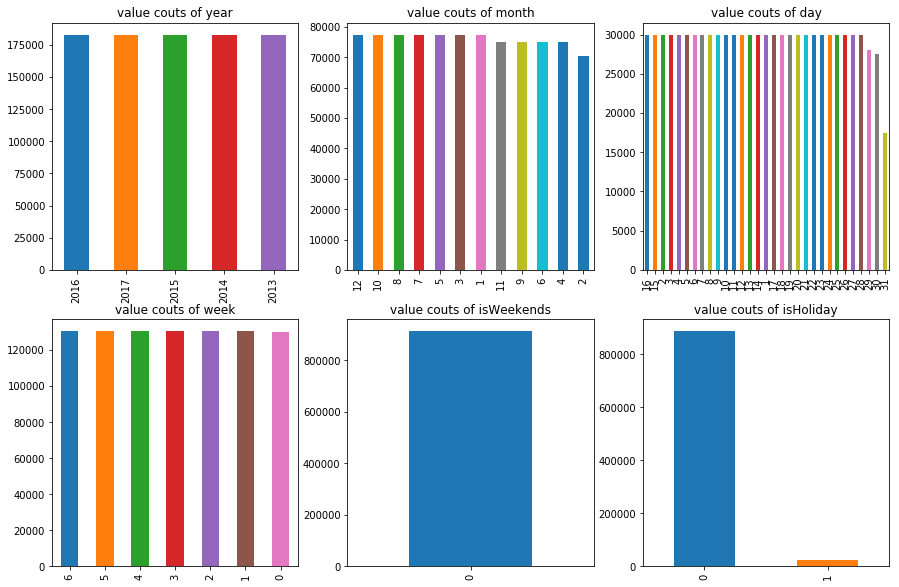

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
train_data['year'].value_counts().plot.bar(ax=axes[0,0], title='value couts of year', )
train_data['month'].value_counts().plot.bar(ax=axes[0,1], title='value couts of month', )
train_data['day'].value_counts().plot.bar(ax=axes[0,2], title='value couts of day', )
train_data['weekday'].value_counts().plot.bar(ax=axes[1,0], title='value couts of week', )
train_data['isWeekend'].value_counts().plot.bar(ax=axes[1,1], title='value couts of isWeekends', )
train_data['isHoliday'].value_counts().plot.bar(ax=axes[1,2], title='value couts of isHoliday', )

if save_figure:
    fig.savefig(f'{GRAPHS_DIR}/value_counts_of_date.png')

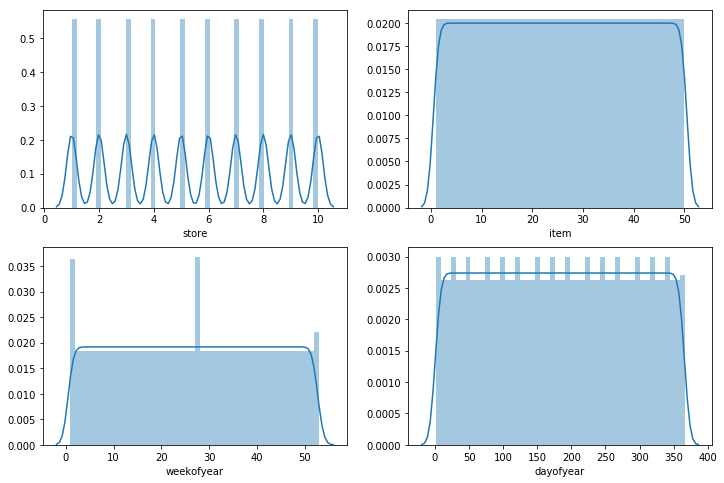

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.distplot(train_data['store'], ax=axes[0, 0])
sns.distplot(train_data['item'], ax=axes[0, 1])
sns.distplot(train_data['weekofyear'], ax=axes[1, 0])
sns.distplot(train_data['dayofyear'], ax=axes[1, 1])

if save_figure:
    file_name = 'distribution_of_data'
    fig.savefig(f'{GRAPHS_DIR}/{file_name}.png')

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Distribution of sales')
sns.distplot(train_data['sales'])
if save_figure:
    file_name = 'distribution_of_sales'
    fig.savefig(f'{GRAPHS_DIR}/{file_name}.png')

## Plotting time Columns with Sales

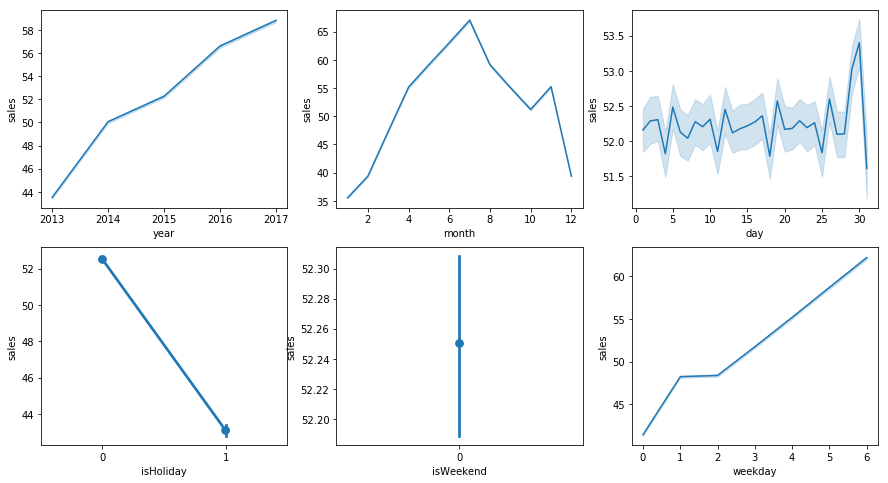

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
# can replace sns.lineplot with sns.pointplot
sns.lineplot(x='year', y='sales', data=train_data, ax=axes[0,0])
sns.lineplot(x='month', y='sales', data=train_data, ax=axes[0,1])
sns.lineplot(x='day', y='sales', data=train_data, ax=axes[0,2])
sns.pointplot(x='isHoliday', y='sales', data=train_data, ax=axes[1,0])
sns.pointplot(x='isWeekend', y='sales', data=train_data, ax=axes[1,1])
sns.lineplot(x='weekday', y='sales', data=train_data, ax=axes[1,2])

if save_figure:
    file_name = 'sales_vs_dates'
    fig.savefig(f'{GRAPHS_DIR}/{file_name}.png')

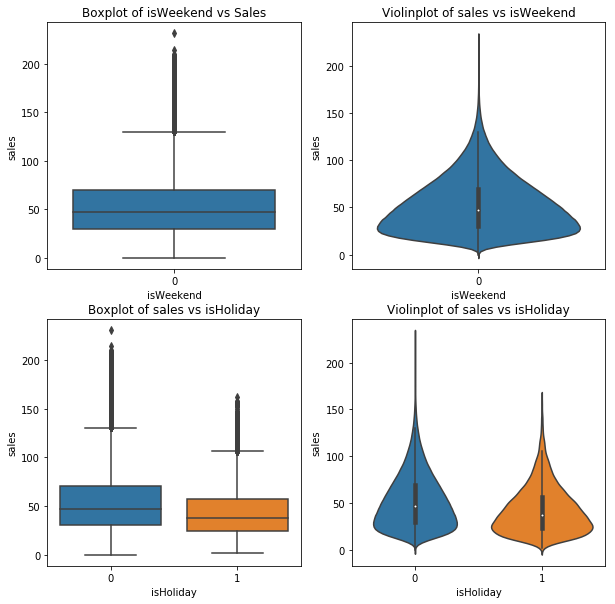

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# isWeekend column
sns.boxplot(x='isWeekend', y='sales', data=train_data, ax=axes[0,0]).set_title('Boxplot of isWeekend vs Sales')
sns.violinplot(x='isWeekend', y='sales', data=train_data, ax=axes[0,1]).set_title('Violinplot of sales vs isWeekend')

# isHoliday column
sns.boxplot(x='isHoliday', y='sales', data=train_data, ax=axes[1,0]).set_title('Boxplot of sales vs isHoliday')
sns.violinplot(x='isHoliday', y='sales', data=train_data, ax=axes[1,1]).set_title('Violinplot of sales vs isHoliday')

if save_figure:
    file_name = 'box_violin_plot_of_sales_isWeekend_isHoliday'
    fig.savefig(f'{GRAPHS_DIR}/{file_name}.png')

saving image


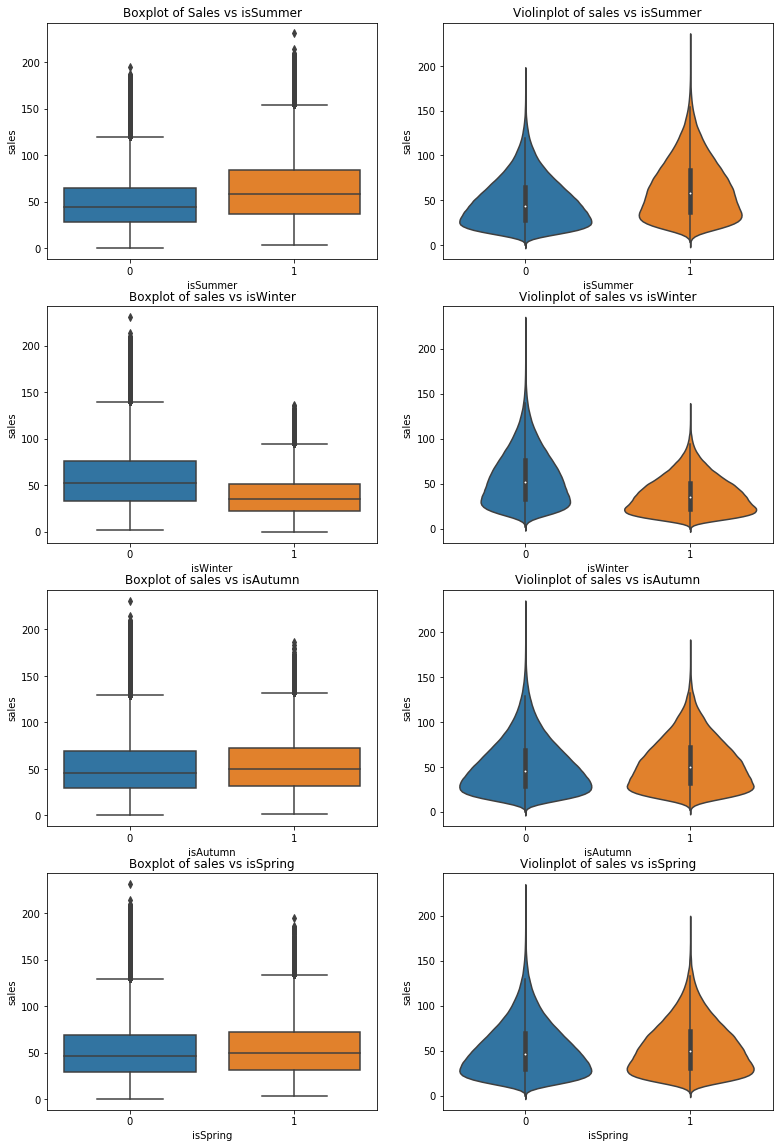

In [25]:
fig, axes = plt.subplots(4, 2, figsize=(13, 20))
sns.boxplot(x='isSummer', y='sales', data=train_data, ax=axes[0,0]).set_title('Boxplot of Sales vs isSummer')
sns.violinplot(x='isSummer', y='sales', data=train_data, ax=axes[0,1]).set_title('Violinplot of sales vs isSummer')

sns.boxplot(x='isWinter', y='sales', data=train_data, ax=axes[1,0]).set_title('Boxplot of sales vs isWinter')
sns.violinplot(x='isWinter', y='sales', data=train_data, ax=axes[1,1]).set_title('Violinplot of sales vs isWinter')

sns.boxplot(x='isAutumn', y='sales', data=train_data, ax=axes[2,0]).set_title('Boxplot of sales vs isAutumn')
sns.violinplot(x='isAutumn', y='sales', data=train_data, ax=axes[2,1]).set_title('Violinplot of sales vs isAutumn')

sns.boxplot(x='isSpring', y='sales', data=train_data, ax=axes[3,0]).set_title('Boxplot of sales vs isSpring')
sns.violinplot(x='isSpring', y='sales', data=train_data, ax=axes[3,1]).set_title('Violinplot of sales vs isSpring')

if save_figure:
    print('saving image')
    file_name = 'box_violin_plot_of_sales_vs_spring'
    fig.savefig(f'{GRAPHS_DIR}/{file_name}.png')

## Plotting Store Columns with Sales

saving image


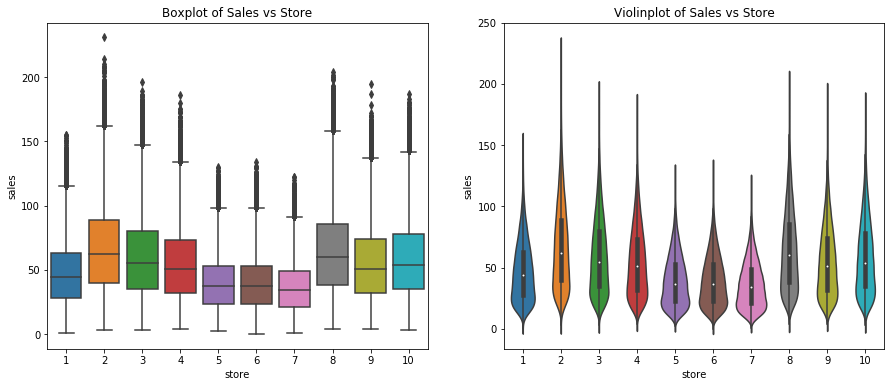

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='store', y='sales', data=train_data, ax=axes[0]).set_title('Boxplot of Sales vs Store')
sns.violinplot(x='store', y='sales', data=train_data, ax=axes[1]).set_title('Violinplot of Sales vs Store')

if save_figure:
    print('saving image')
    file_name = 'box_violin_plot_of_sales_vs_store'
    fig.savefig(f'{GRAPHS_DIR}/{file_name}.png')

In [53]:
train_data[['store', 'sales','store_sales_sum', 'store_year_sales_sum', 'store_month_sales_sum', 'store_day_sales_sum']].head()

,store,sales,store_sales_sum,store_year_sales_sum,store_month_sales_sum,store_day_sales_sum
0,1,13.0,4315603.0,717840.0,249352.0,141278.0
1,1,11.0,4315603.0,717840.0,249352.0,141415.0
2,1,14.0,4315603.0,717840.0,249352.0,141471.0
3,1,13.0,4315603.0,717840.0,249352.0,141239.0
4,1,10.0,4315603.0,717840.0,249352.0,142118.0


saving image


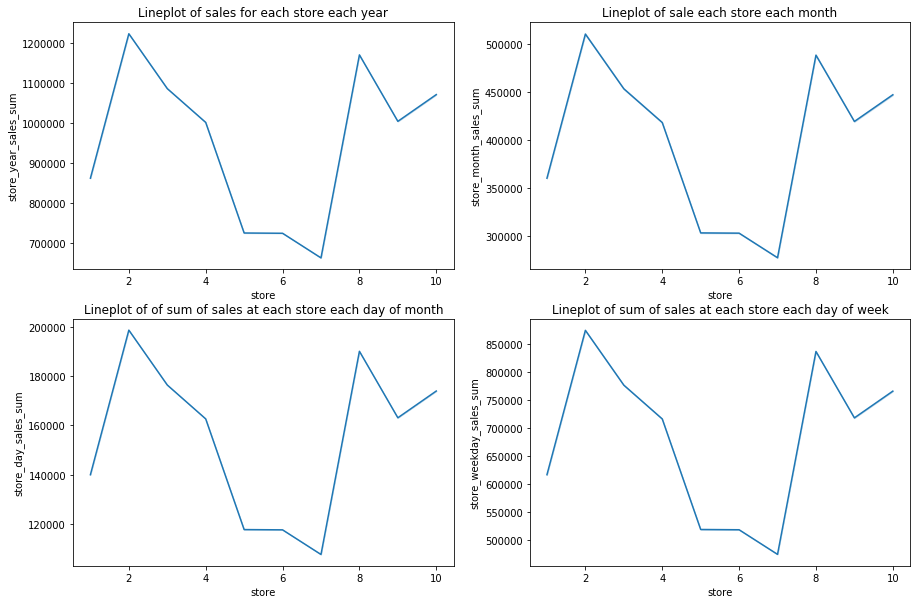

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.lineplot(x='store', y='store_year_sales_sum', data=train_data, ax=axes[0, 0]).set_title('Lineplot of sales for each store each year')
sns.lineplot(x='store', y='store_month_sales_sum', data=train_data, ax=axes[0, 1]).set_title('Lineplot of sale each store each month')
sns.lineplot(x='store', y='store_day_sales_sum', data=train_data, ax=axes[1, 0]).set_title('Lineplot of of sum of sales at each store each day of month')
sns.lineplot(x='store', y='store_weekday_sales_sum', data=train_data, ax=axes[1, 1]).set_title('Lineplot of sum of sales at each store each day of week')

if save_figure:
    print('saving image')
    file_name = 'Lineplot of store_vs_sales_at_different_times'
    fig.savefig(f'{GRAPHS_DIR}/{file_name}.png')

In [54]:
train_data[['store', 'sales','store_sales_median', 'store_year_sales_median', 'store_month_sales_median', 'store_day_sales_median']].head()

,store,sales,store_sales_median,store_year_sales_median,store_month_sales_median,store_day_sales_median
0,1,13.0,44.0,37.0,31.0,44.0
1,1,11.0,44.0,37.0,31.0,44.0
2,1,14.0,44.0,37.0,31.0,43.0
3,1,13.0,44.0,37.0,31.0,43.0
4,1,10.0,44.0,37.0,31.0,44.0


saving image


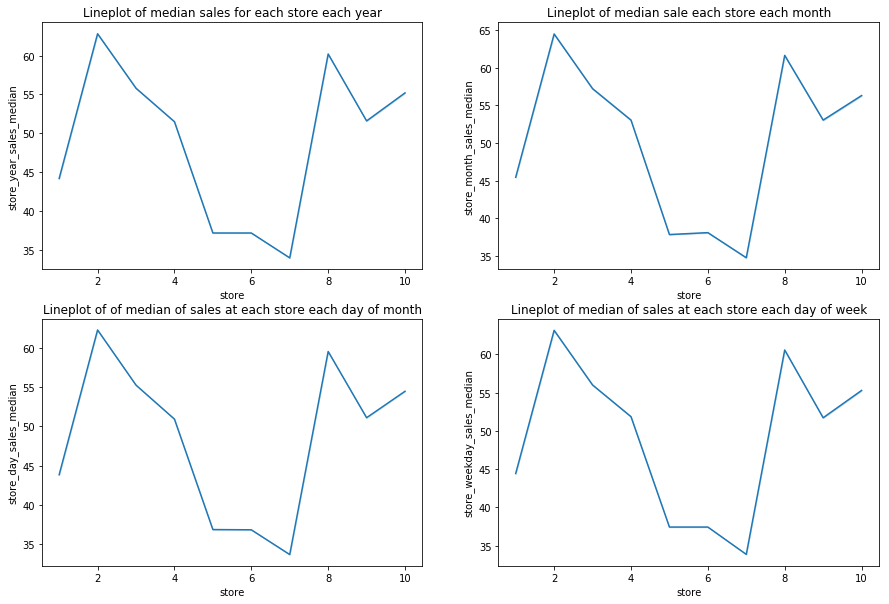

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.lineplot(x='store', y='store_year_sales_median', data=train_data, ax=axes[0, 0]).set_title('Lineplot of median sales for each store each year')
sns.lineplot(x='store', y='store_month_sales_median', data=train_data, ax=axes[0, 1]).set_title('Lineplot of median sale each store each month')
sns.lineplot(x='store', y='store_day_sales_median', data=train_data, ax=axes[1, 0]).set_title('Lineplot of of median of sales at each store each day of month')
sns.lineplot(x='store', y='store_weekday_sales_median', data=train_data, ax=axes[1, 1]).set_title('Lineplot of median of sales at each store each day of week')

if save_figure:
    print('saving image')
    file_name = 'Lineplot_of_store_vs_median_sales_at_different_times'
    fig.savefig(f'{GRAPHS_DIR}/{file_name}.png')

In [62]:
train_data[['store', 'sales','store_sales_sum', 'store_year_month_sales_sum', 'store_year_day_sales_sum', 'store_weekofyear_sales_sum', 'store_dayofyear_sales_sum', 'store_year_day_sales_sum', 'store_month_day_sales_sum']].head()

,store,sales,store_sales_sum,store_year_month_sales_sum,store_year_day_sales_sum,store_weekofyear_sales_sum,store_dayofyear_sales_sum,store_year_day_sales_sum,store_month_day_sales_sum
0,1,13.0,4315603.0,41077.0,23770.0,55300.0,8066.0,23770.0,8066.0
1,1,11.0,4315603.0,41077.0,23482.0,55300.0,7882.0,23482.0,7882.0
2,1,14.0,4315603.0,41077.0,23601.0,55300.0,8375.0,23601.0,8375.0
3,1,13.0,4315603.0,41077.0,22889.0,55300.0,8136.0,22889.0,8136.0
4,1,10.0,4315603.0,41077.0,23401.0,55300.0,8248.0,23401.0,8248.0


saving image


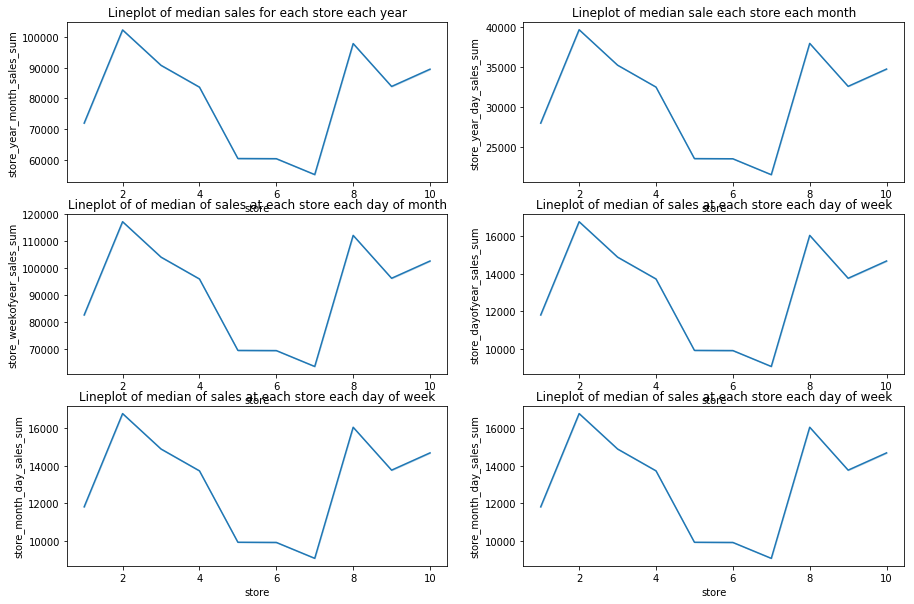

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.lineplot(x='store', y='store_year_month_sales_sum', data=train_data, ax=axes[0, 0]).set_title('Lineplot of median sales for each store each year')
sns.lineplot(x='store', y='store_year_day_sales_sum', data=train_data, ax=axes[0, 1]).set_title('Lineplot of median sale each store each month')
sns.lineplot(x='store', y='store_weekofyear_sales_sum', data=train_data, ax=axes[1, 0]).set_title('Lineplot of of median of sales at each store each day of month')
sns.lineplot(x='store', y='store_dayofyear_sales_sum', data=train_data, ax=axes[1, 1]).set_title('Lineplot of median of sales at each store each day of week')
sns.lineplot(x='store', y='store_month_day_sales_sum', data=train_data, ax=axes[2, 0]).set_title('Lineplot of median of sales at each store each day of week')
sns.lineplot(x='store', y='store_month_day_sales_sum', data=train_data, ax=axes[2, 1]).set_title('Lineplot of median of sales at each store each day of week')
if save_figure:
    print('saving image')
    file_name = 'box_violin_plot_of_median_and_sum_sales'
    fig.savefig(f'{GRAPHS_DIR}/{file_name}.png')

saving image


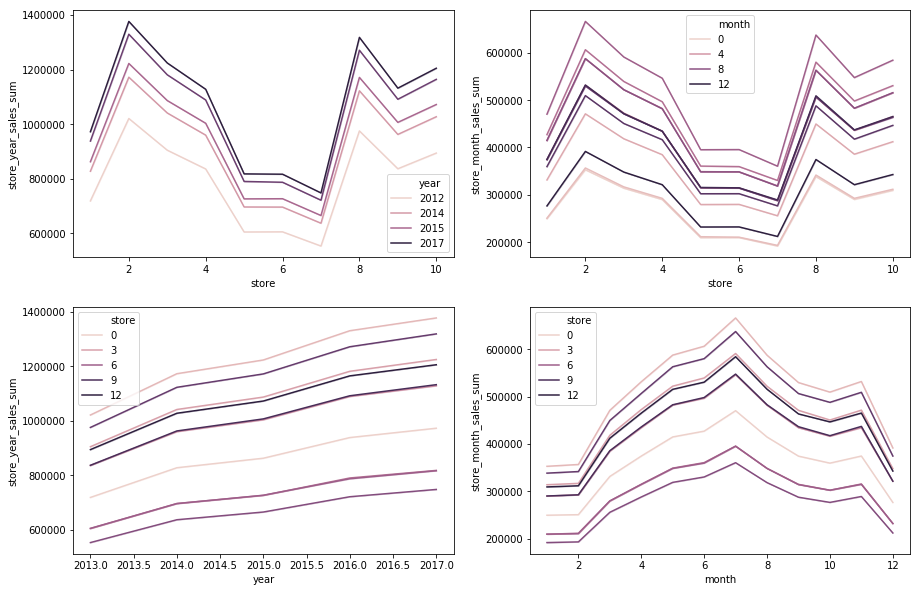

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.lineplot(x='store', y='store_year_sales_sum', hue='year', data=train_data, ax=axes[0,0])
sns.lineplot(x='store', y='store_month_sales_sum', hue='month', data=train_data, ax=axes[0,1])
sns.lineplot(x='year', y='store_year_sales_sum', hue='store', data=train_data, ax=axes[1,0])
sns.lineplot(x='month', y='store_month_sales_sum', hue='store', data=train_data, ax=axes[1,1])

if save_figure:
    print('saving image')
    file_name = 'lineplot_of_store_vs_sales_vs_year'
    fig.savefig(f'{GRAPHS_DIR}/{file_name}.png')

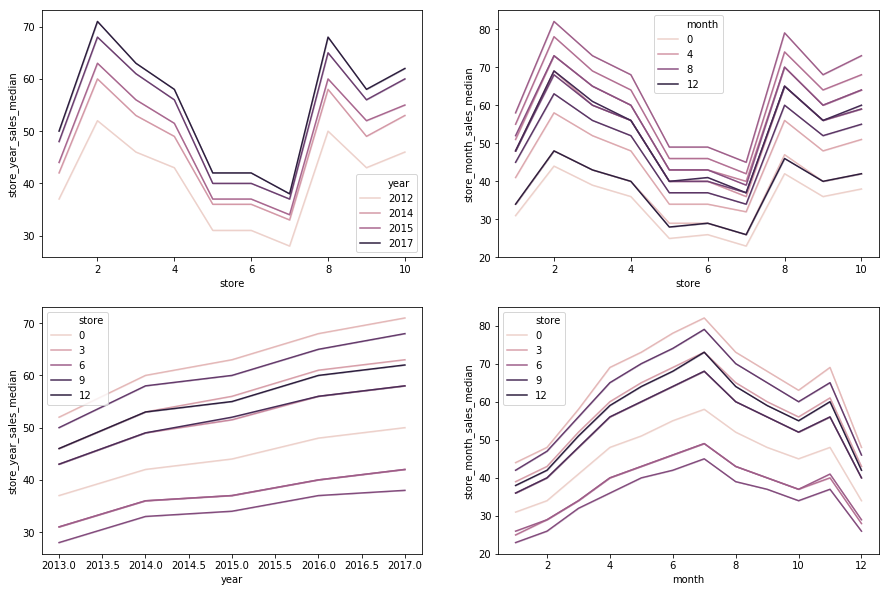

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.lineplot(x='store', y='store_year_sales_median', hue='year', data=train_data, ax=axes[0,0])
sns.lineplot(x='store', y='store_month_sales_median', hue='month', data=train_data, ax=axes[0,1])
sns.lineplot(x='year', y='store_year_sales_median', hue='store', data=train_data, ax=axes[1,0])
sns.lineplot(x='month', y='store_month_sales_median', hue='store', data=train_data, ax=axes[1,1])

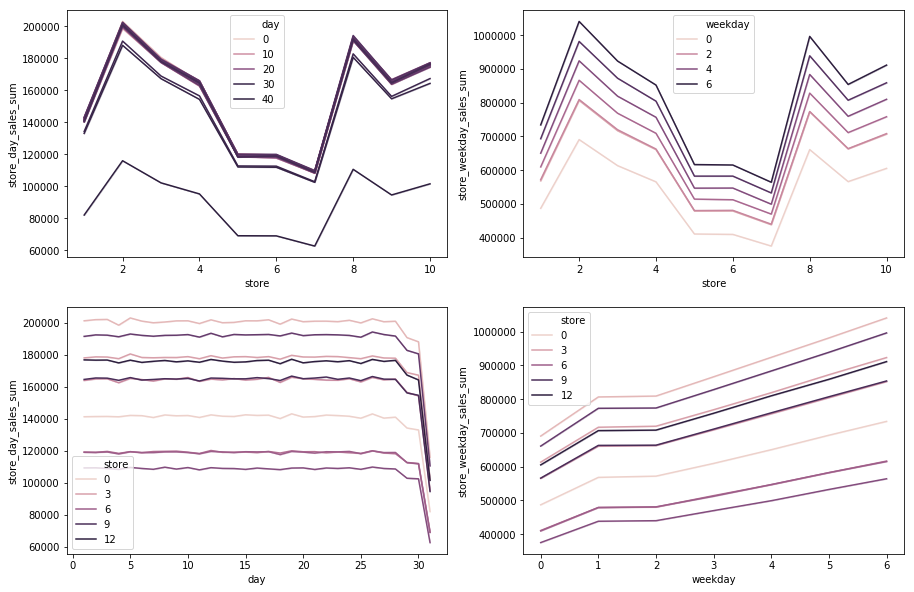

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.lineplot(x='store', y='store_day_sales_sum', hue='day', data=train_data, ax=axes[0,0])
sns.lineplot(x='store', y='store_weekday_sales_sum', hue='weekday', data=train_data, ax=axes[0,1])
sns.lineplot(x='day', y='store_day_sales_sum', hue='store', data=train_data, ax=axes[1,0])
sns.lineplot(x='weekday', y='store_weekday_sales_sum', hue='store', data=train_data, ax=axes[1,1])

In [11]:
train_data.columns

Index(['date', 'store', 'item', 'sales', 'id', 'month', 'weekday', 'year',
       'day', 'weekofyear', 'dayofyear', 'isHoliday', 'isWeekend', 'isSummer',
       'isWinter', 'isAutumn', 'isSpring', 'month_sum', 'month_median',
       'month_mean', 'day_sum', 'day_median', 'day_mean', 'weekofyear_sum',
       'weekofyear_median', 'weekofyear_mean', 'dayofyear_sum',
       'dayofyear_median', 'dayofyear_mean', 'weekday_sum', 'weekday_median',
       'weekday_mean', 'isWeekend_sum', 'isWeekend_median', 'isWeekend_mean',
       'isHoliday_sum', 'isHoliday_median', 'isHoliday_mean', 'isSummer_sum',
       'isSummer_median', 'isSummer_mean', 'isAutumn_sum', 'isAutumn_median',
       'isAutumn_mean', 'isWinter_sum', 'isWinter_median', 'isWinter_mean',
       'store_sales_sum', 'store_sales_median', 'store_sales_mean',
       'store_month_sales_sum', 'store_month_sales_median',
       'store_day_sales_sum', 'store_day_sales_median',
       'store_weekday_sales_sum', 'store_weekday_sales_median'

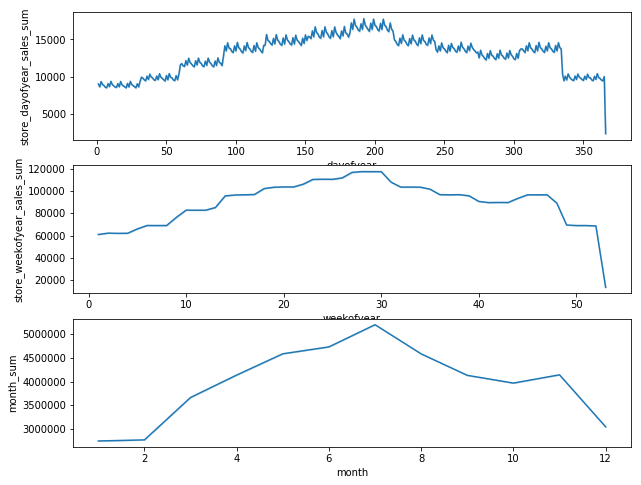

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
sns.lineplot(x='dayofyear', y='store_dayofyear_sales_sum', data=train_data, ax=axes[0])
sns.lineplot(x='weekofyear', y='store_weekofyear_sales_sum', data=train_data, ax=axes[1])
sns.lineplot(x='month', y='month_sum', data=train_data, ax=axes[2])

# Plotting item Colum with Sales

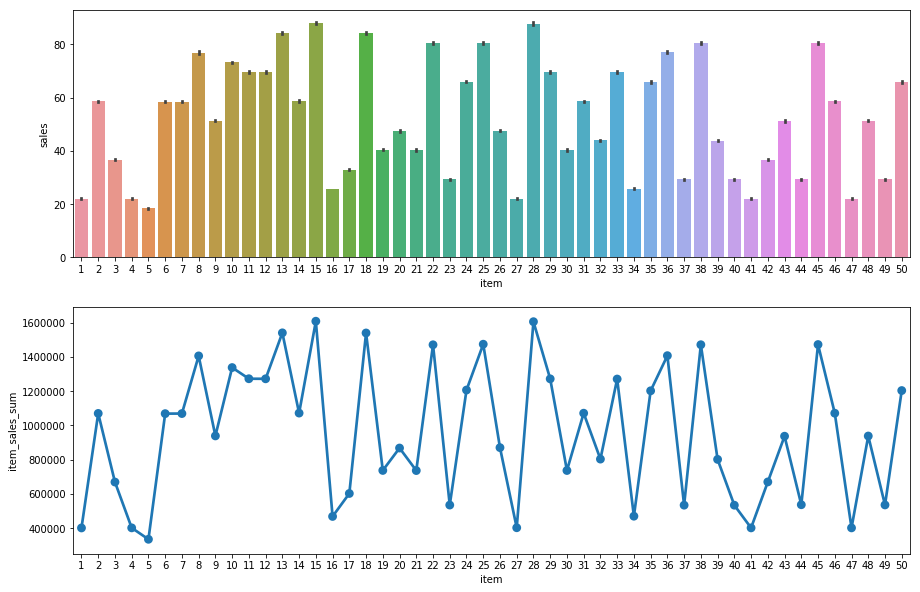

In [85]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.barplot(x='item', y='sales', data=train_data, ax=axes[0])
sns.pointplot(x='item', y='item_sales_sum', data=train_data, ax=axes[1])

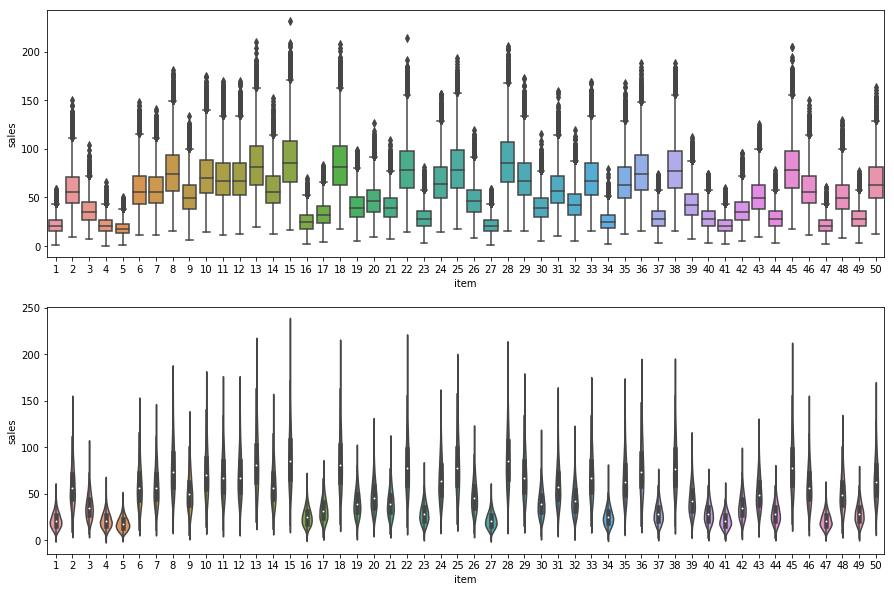

In [86]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.boxplot(x='item', y='sales', data=train_data, ax=axes[0])
sns.violinplot(x='item', y='sales', data=train_data, ax=axes[1])

# Plotting store-item Columns with Sales

In [68]:
train_data.columns.tolist()

['Unnamed: 0',
 'date',
 'store',
 'item',
 'sales',
 'id',
 'month',
 'weekday',
 'year',
 'week_of_year',
 'store_sales_sum',
 'day',
 'day_of_year',
 'isWeekend',
 'isHoliday',
 'store_sales_median',
 'store_year_sales_sum',
 'store_year_sales_median',
 'store_month_sales_sum',
 'store_month_sales_median',
 'store_day_sales_sum',
 'store_day_sales_median',
 'store_weekday_sales_sum',
 'store_weekday_sales_median',
 'store_dayofyear_sales_sum',
 'store_dayofyear_sales_median',
 'store_weekofyear_sales_sum',
 'store_weekofyear_sales_median',
 'store_sales_mean',
 'store_year_day_sales_sum',
 'store_year_day_sales_median',
 'store_year_month_sales_sum',
 'store_year_month_sales_median',
 'store_year_weekday_sales_sum',
 'store_year_weekday_sales_median',
 'store_year_dayofyear_sales_sum',
 'store_year_dayofyear_sales_median',
 'store_year_weekofyear_sales_sum',
 'store_year_weekofyear_sales_median',
 'store_month_day_sales_sum',
 'store_month_day_sales_median',
 'store_month_weekday_sa

In [69]:
features_will_use = np.delete(train_data.columns, [0, 1, 2, 11])
half_the_features = features_will_use[:int(len(features_will_use) /2)]
other_half_features = features_will_use[int(len(features_will_use) /2):]

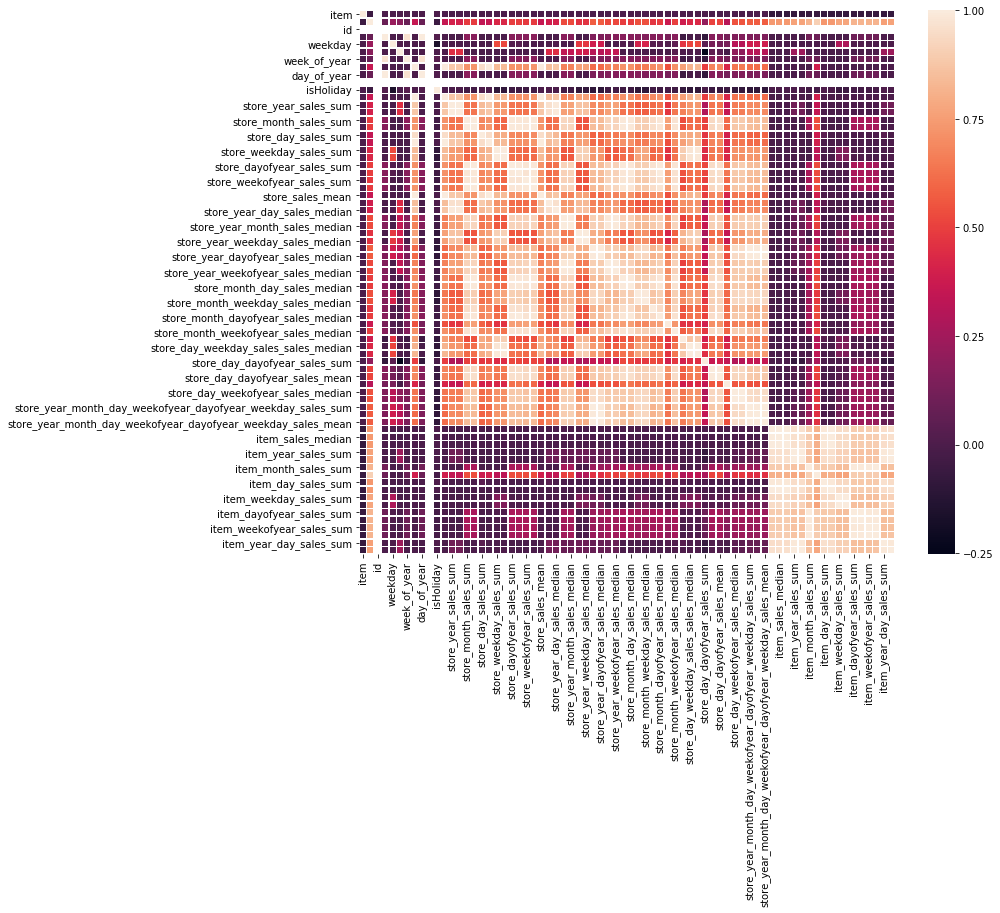

In [70]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data[half_the_features].corr(),
           linewidths=.4, 
           annot=False, 
           annot_kws={'fontsize':10 })

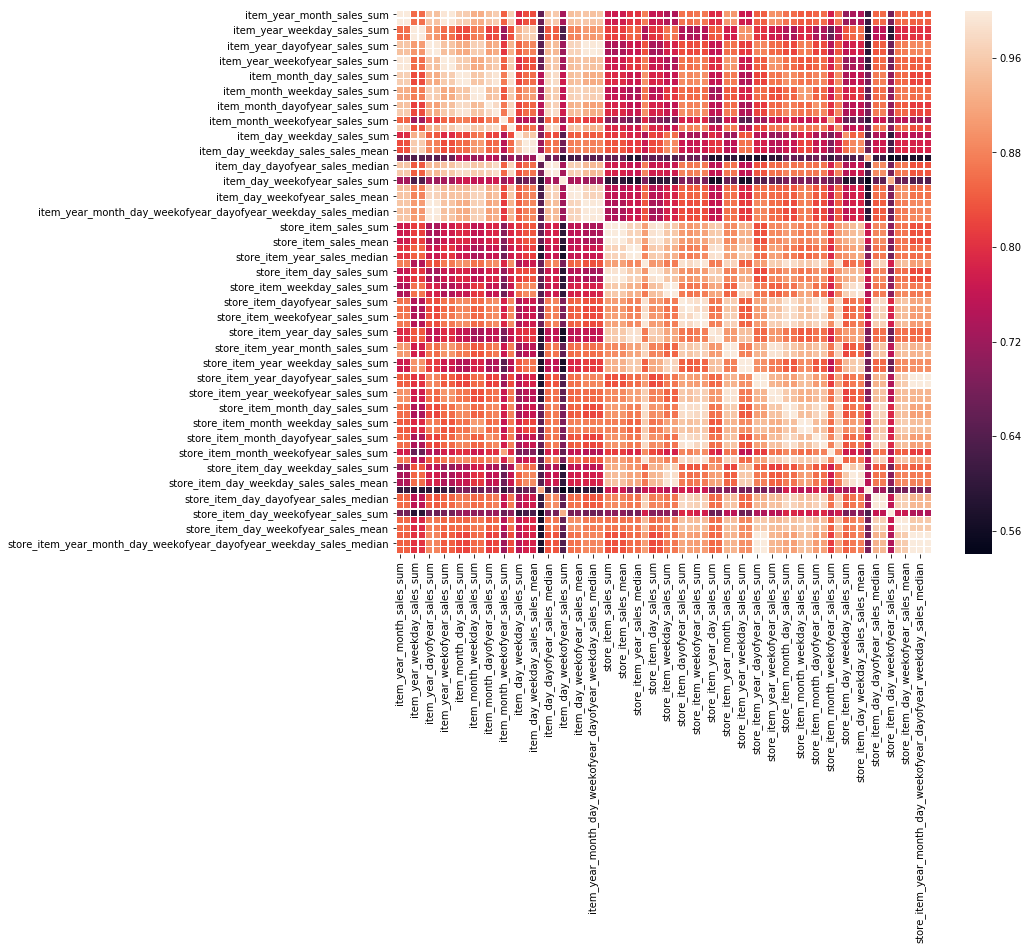

In [71]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data[other_half_features].corr(),
           linewidths=.4, 
           annot=False, 
           annot_kws={'fontsize':10 })

# Autocorrelation of Data

In [72]:
from pandas.plotting import autocorrelation_plot

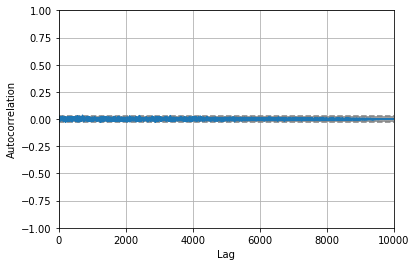

In [83]:
autocorrelation_plot(train_data['item_sales_sum'].sample(10000))

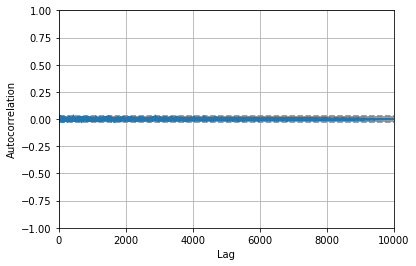

In [84]:
autocorrelation_plot(train_data['store_sales_sum'].sample(10000))